In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Data Preprocessing

In [183]:
df = pd.read_csv("G:\Study\iit kharagpur\ML Lab\Lab 1\ML_Lab_2\dataset_traffic_accident_prediction1.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Swastik\AppData\Local\Temp\ipykernel_4212\1844795570.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("G:\Study\iit kharagpur\ML Lab\Lab 1\ML_Lab_2\dataset_traffic_accident_prediction1.csv")


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [184]:
columns = list(df.columns)
columns_dict = {}
for column in columns:
    columns_dict[column] = df[column].unique()

print(columns_dict)

{'Weather': array(['Rainy', 'Clear', 'Foggy', 'Stormy', nan, 'Snowy'], dtype=object), 'Road_Type': array(['City Road', 'Rural Road', 'Highway', nan, 'Mountain Road'],
      dtype=object), 'Time_of_Day': array(['Morning', 'Night', 'Evening', 'Afternoon', nan], dtype=object), 'Traffic_Density': array([ 1., nan,  2.,  0.]), 'Speed_Limit': array([100., 120.,  60., 195.,  30.,  nan,  50.,  80., 200., 206., 178.,
       208., 213., 190., 196., 188., 194., 189., 193., 185., 199., 192.,
       198., 212., 181.]), 'Number_of_Vehicles': array([ 5.,  3.,  4., 11.,  2.,  1., nan, 12., 13., 14., 10.]), 'Driver_Alcohol': array([ 0.,  1., nan]), 'Accident_Severity': array([nan, 'Moderate', 'Low', 'High'], dtype=object), 'Road_Condition': array(['Wet', 'Icy', 'Under Construction', 'Dry', nan], dtype=object), 'Vehicle_Type': array(['Car', 'Truck', 'Bus', 'Motorcycle', nan], dtype=object), 'Driver_Age': array([51., 49., 54., 34., 62., 27., 29., 38., 50., 33., 47., 25., 67.,
       61., 46., 48., 53., 35

In [185]:
df.dropna(inplace=True)

In [186]:
priority_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Accident_Severity'] = df['Accident_Severity'].map(priority_mapping)

time_of_day_mapping = {'Morning': 0, 'Night': 3, 'Evening': 2, 'Afternoon': 1}
df['Time_of_Day'] = df['Time_of_Day'].map(time_of_day_mapping)

road_light_mapping = {'Artificial Light': 1, 'Daylight': 0, 'No Light': 2}
df['Road_Light_Condition'] = df['Road_Light_Condition'].map(road_light_mapping)

ohe_road_type = OneHotEncoder()
road_type_encoder = ohe_road_type.fit_transform(df[['Road_Type']])
road_type_encoder_df = pd.DataFrame(road_type_encoder.toarray(), columns=ohe_road_type.get_feature_names_out(['Road_Type']), index=df.index)
df = pd.concat([df.drop("Road_Type", axis=1), road_type_encoder_df], axis=1)

ohe_weather = OneHotEncoder()
weather_encoder = ohe_weather.fit_transform(df[['Weather']])
weather_encoder_df = pd.DataFrame(weather_encoder.toarray(), columns=ohe_weather.get_feature_names_out(['Weather']), index=df.index)
df = pd.concat([df.drop("Weather", axis=1), weather_encoder_df], axis=1)

ohe_road_cond = OneHotEncoder()
road_cond_encoder = ohe_road_cond.fit_transform(df[['Road_Condition']])
road_cond_encoder_df = pd.DataFrame(road_cond_encoder.toarray(), columns=ohe_road_cond.get_feature_names_out(['Road_Condition']), index=df.index)
df = pd.concat([df.drop("Road_Condition", axis=1), road_cond_encoder_df], axis=1)

ohe_vehicle = OneHotEncoder()
vehicle_encoder = ohe_vehicle.fit_transform(df[["Vehicle_Type"]])
vehicle_encoder_df = pd.DataFrame(vehicle_encoder.toarray(), columns=ohe_vehicle.get_feature_names_out(['Vehicle_Type']), index=df.index)
df = pd.concat([df.drop("Vehicle_Type", axis=1), vehicle_encoder_df], axis=1)

df['Speed_Limit'] = pd.qcut(df['Speed_Limit'], q=3, labels=['Low', 'Moderate', 'High'])
df['Speed_Limit'] = df['Speed_Limit'].map(priority_mapping)

df['Driver_Age'] = pd.qcut(df['Driver_Age'], q=3, labels=['Low', 'Moderate', 'High'])
df['Driver_Age'] = df['Driver_Age'].map(priority_mapping)

df['Driver_Experience'] = pd.qcut(df['Driver_Experience'], q=3, labels=['Low', 'Moderate', 'High'])
df['Driver_Experience'] = df['Driver_Experience'].map(priority_mapping)

df['Number_of_Vehicles'] = pd.qcut(df['Number_of_Vehicles'], q=3, labels=['Low', 'Moderate', 'High'])
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].map(priority_mapping)

df.head()

,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Road_Light_Condition,Accident,...,Weather_Snowy,Weather_Stormy,Road_Condition_Dry,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck
2,2,1.0,0,1,0.0,0,2,2,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,2.0,0,1,0.0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,1.0,2,2,0.0,0,2,2,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,0.0,0,1,0.0,0,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,0.0,0,1,0.0,0,0,0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [187]:
## Prepare X and y
X = df.drop(['Accident'], axis=1)
y = df['Accident']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Split the data

print(X.shape)
print(y.shape)

(405, 26)
(405,)


## Random Forest Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(
                    random_state=42, 
                    n_jobs=-1, 
                    max_depth=5,
                    n_estimators=100,
                    oob_score=True
                    )

In [189]:
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

In [190]:
print(f"The accuracy of the Random Forest Classifier is {accuracy_score(y_test,y_pred_rf)}")

The accuracy of the Random Forest Classifier is 0.7160493827160493


## Support Vector Classifier

In [191]:
from sklearn.svm import SVC

classifier_svc = SVC(kernel='rbf', probability=True)

In [192]:
classifier_svc.fit(X_train, y_train)
y_pred_svc = classifier_svc.predict(X_test)

In [193]:
print(f"The accuracy of Support Vector Classifier is {accuracy_score(y_test,y_pred_svc)}")

The accuracy of Support Vector Classifier is 0.7037037037037037


In [194]:
## Cross Validation for both the classifiers 
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(classifier_rf, X_train, y_train, cv=5)
print(f"The cross validation scores for Random Forest are {cv_scores_rf.round(4)} and the mean score is {cv_scores_rf.mean()}")

cv_scores_svc = cross_val_score(classifier_svc, X_train, y_train, cv=5)
print(f"The cross validation scores for Support Vector Classifier are {cv_scores_svc.round(4)} and the mean score is {cv_scores_svc.mean()}")

The cross validation scores for Random Forest are [0.6615 0.7231 0.7385 0.7231 0.7031] and the mean score is 0.7098557692307692
The cross validation scores for Support Vector Classifier are [0.7077 0.7077 0.7077 0.7231 0.7031] and the mean score is 0.7098557692307692


C:\Users\Swastik\AppData\Local\Temp\ipykernel_4212\618218237.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


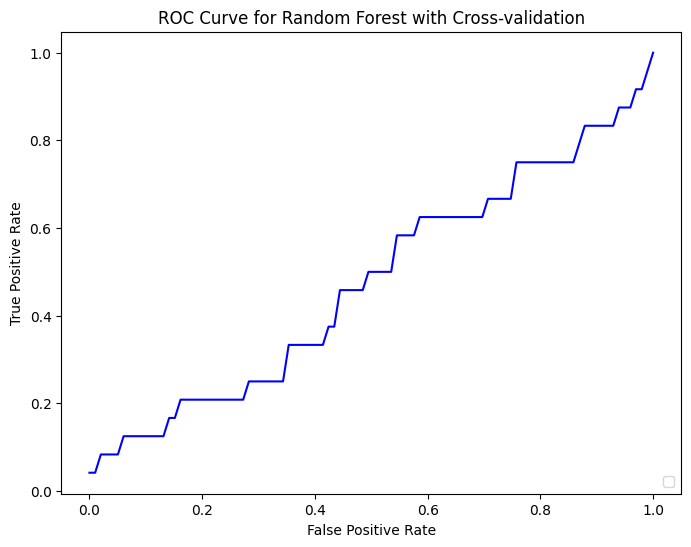

In [195]:
## ROC curve for Random Forest
# Stratified K-Folds cross-validation
from sklearn.metrics import roc_curve

classifier_rf.fit(X_train, y_train)
y_score = classifier_rf.predict_proba(X_test)[:, 1]  # Get the predicted probabilities

fpr, tpr, _ = roc_curve(y_test, y_score)

# Average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.interp(mean_fpr, fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest with Cross-validation')
plt.legend(loc='lower right')
plt.show()

C:\Users\Swastik\AppData\Local\Temp\ipykernel_4212\4079475090.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


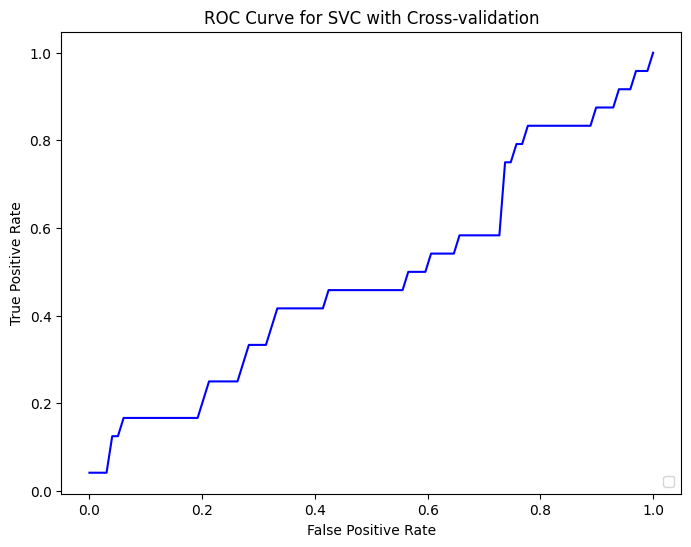

In [196]:
## ROC curve for Support Vector Classifier
classifier_svc.fit(X_train, y_train)
y_score = classifier_svc.predict_proba(X_test)[:, 1]  # Get the predicted probabilities

fpr, tpr, _ = roc_curve(y_test, y_score)

# Average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.interp(mean_fpr, fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC with Cross-validation')
plt.legend(loc='lower right')
plt.show()